In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


In [26]:
df = pd.concat([pd.read_csv(filename, index_col=0) for filename in glob("figs/results_dermamnist*")])
df = df.rename(columns={"crypt_acc":"accuracy", "enc_time":"enc time", "add_time":"add time", "dec_time":"dec time", "n_parts":"parts"})
df


,model,param,parts,crypt_time,accuracy,enc time,add time,dec time
0,tfhe,512,8,87.314405,0.669825,109352.000000,353688.000000,4368.000000
1,tfhe,512,8,86.983193,0.670823,112760.000000,344304.000000,3792.000000
2,tfhe,512,8,84.568184,0.674813,109256.000000,333088.000000,4112.000000
3,tfhe,512,8,83.936563,0.678803,65192.000000,285592.000000,4136.000000
4,tfhe,512,8,88.327126,0.672818,109720.000000,355592.000000,4000.000000
...,...,...,...,...,...,...,...,...
15,ckks,4096,2,82.096786,0.679800,0.006717,0.000119,0.001618
16,ckks,4096,2,81.173295,0.680798,0.006703,0.000124,0.001627
17,ckks,4096,2,83.686692,0.674314,0.006721,0.000121,0.001588
18,ckks,4096,2,84.003573,0.685287,0.084996,0.000350,0.003007


In [27]:
df.groupby(["model","param","parts"])[["crypt_time"]].count().T



model      ckks                                    plain                tfhe  \
param      4096                8192                 text                 256   
parts        2    4    8    16   2    4    8    16    2    4    8    16   2    
crypt_time  100  100  100  100  100  100  100  100   100  100  100  100  100   

model                                          
param                      512                 
parts        4    8    16   2    4    8    16  
crypt_time  100  100  100  100  100  100  100

In [28]:
avg = df.groupby(["model","param","parts"]).mean()
avg


crypt_time  accuracy      enc time       add time  \
model param parts                                                      
ckks  4096  2       81.768135  0.682888      0.010397       0.000133   
            4       83.370142  0.679416      0.007955       0.000314   
            8       83.947195  0.675800      0.006817       0.000605   
            16      85.674914  0.670589      0.006809       0.001196   
      8192  2       81.913454  0.683586      0.028535       0.000322   
            4       83.160299  0.680688      0.016493       0.000825   
            8       83.680621  0.675516      0.013236       0.001412   
            16      85.571274  0.671641      0.010627       0.002535   
plain text  2       81.732412  0.684823     -1.000000      -1.000000   
            4       82.965006  0.679132     -1.000000      -1.000000   
            8       77.605639  0.675242     -1.000000      -1.000000   
            16      78.564618  0.671571     -1.000000      -1.000000   
tfhe  256   2       77.548831  0.680663  51204.640000   20641.520000   
            4       78.652192  0.673451  40378.400000   45210.320000   
            8       81.358911  0.663436  43927.360000  125640.080000   
            16      85.740848  0.647471  48764.240000  322025.520000   
      512   2       77.803549  0.683930  85788.480000   45745.360000   
            4       80.067956  0.680304  85673.920000  126823.120000   
            8       84.673290  0.675431  97266.080000  350253.440000   
            16      91.004592  0.672459  71831.760000  715162.880000   

                      dec time  
model param parts               
ckks  4096  2         0.002990  
            4         0.001665  
            8         0.001631  
            16        0.001634  
      8192  2         0.003261  
            4         0.003548  
            8         0.002550  
            16        0.002619  
plain text  2        -1.000000  
            4        -1.000000  
            8        -1.000000  
            16       -1.000000  
tfhe  256   2      2196.080000  
            4      1770.880000  
            8      1966.720000  
            16     1827.040000  
      512   2      4096.480000  
            4      4321.440000  
            8      4367.840000  
            16     3489.600000

In [29]:
avg = avg.reset_index()
avg["scheme"] = avg["model"] + " " + avg["param"].apply(str)
avg = 100*avg.reset_index().pivot(index=["scheme"], columns="parts", values="accuracy")
avg


parts,2,4,8,16
scheme,,,,
ckks 4096,68.288778,67.941646,67.580050,67.058853
ckks 8192,68.358603,68.068828,67.551621,67.164090
plain text,68.482294,67.913217,67.524190,67.157107
tfhe 256,68.066334,67.345137,66.343641,64.747132
tfhe 512,68.393017,68.030424,67.543142,67.245885


In [30]:
std = df.groupby(["model","param","parts"]).std()
std


crypt_time  accuracy      enc time      add time  \
model param parts                                                     
ckks  4096  2        1.138127  0.005837      0.014313      0.000037   
            4        1.381679  0.005121      0.006382      0.000062   
            8        1.355866  0.004953      0.001610      0.000082   
            16       1.592565  0.004916      0.000751      0.000180   
      8192  2        1.407482  0.006207      0.019393      0.000136   
            4        1.249187  0.005370      0.009565      0.000270   
            8        1.284839  0.004983      0.004739      0.000359   
            16       1.215785  0.004552      0.002342      0.000531   
plain text  2        1.291511  0.006198      0.000000      0.000000   
            4        1.372475  0.006168      0.000000      0.000000   
            8        2.049443  0.005092      0.000000      0.000000   
            16       2.099050  0.005270      0.000000      0.000000   
tfhe  256   2        1.905296  0.006713  22473.253732   8543.047554   
            4        1.504917  0.008310  11999.789439   9722.410429   
            8        2.116766  0.008721  11572.044318  28158.715386   
            16       2.450261  0.015054  11371.349315  60343.463140   
      512   2        3.480392  0.005724  27847.481854  10579.665805   
            4        1.551916  0.006512  21203.211622  19255.684231   
            8        3.219055  0.005471  19887.941608  50889.109621   
            16       1.775283  0.005007  12974.096260  56913.329098   

                      dec time  
model param parts               
ckks  4096  2         0.012711  
            4         0.000311  
            8         0.000160  
            16        0.000128  
      8192  2         0.006406  
            4         0.006622  
            8         0.000267  
            16        0.000557  
plain text  2         0.000000  
            4         0.000000  
            8         0.000000  
            16        0.000000  
tfhe  256   2      1043.867553  
            4       436.044694  
            8       577.251973  
            16      458.041547  
      512   2      1089.944086  
            4      1061.238540  
            8       705.536413  
            16      318.726760

In [31]:
std = std.reset_index()
std["scheme"] = std["model"] + " " + std["param"].apply(str)
std = 100*std.reset_index().pivot(index=["scheme"], columns="parts", values="accuracy")
std


parts,2,4,8,16
scheme,,,,
ckks 4096,0.583698,0.512119,0.495314,0.491622
ckks 8192,0.620683,0.537014,0.498254,0.455216
plain text,0.619799,0.616831,0.509174,0.527045
tfhe 256,0.671316,0.831039,0.872078,1.505440
tfhe 512,0.572369,0.651163,0.547052,0.500668


In [32]:
acc_summary = avg.round(1).astype(str) + "±" + std.round(1).astype(str) + ""
acc_summary = acc_summary.iloc[[3,4,0,1,2]]
acc_summary.to_csv("tbls/medmnist_acc_summary.csv")
acc_summary


parts,2,4,8,16
scheme,,,,
tfhe 256,68.1±0.7,67.3±0.8,66.3±0.9,64.7±1.5
tfhe 512,68.4±0.6,68.0±0.7,67.5±0.5,67.2±0.5
ckks 4096,68.3±0.6,67.9±0.5,67.6±0.5,67.1±0.5
ckks 8192,68.4±0.6,68.1±0.5,67.6±0.5,67.2±0.5
plain text,68.5±0.6,67.9±0.6,67.5±0.5,67.2±0.5


In [33]:
time_summary = df[df["param"]!="none"].copy()
time_summary["scheme"] = time_summary["model"] + " " + time_summary["param"].apply(str)


for col in ["enc time","add time","dec time"]:
    time_summary.loc[time_summary["model"]=="ckks",col] *= 1000 
    time_summary.loc[time_summary["model"]=="tfhe",col] /= 1000 
    
time_summary = time_summary.loc[:,["scheme","enc time","add time","dec time"]].groupby(["scheme"]).mean().round(1).iloc[[3,4,0,1]]
time_summary.to_csv("tbls/medmnist_time_summary.csv")
time_summary



,enc time,add time,dec time
scheme,,,
tfhe 256,46.1,128.4,1.9
tfhe 512,85.1,309.5,4.1
ckks 4096,8.0,0.6,2.0
ckks 8192,17.2,1.3,3.0


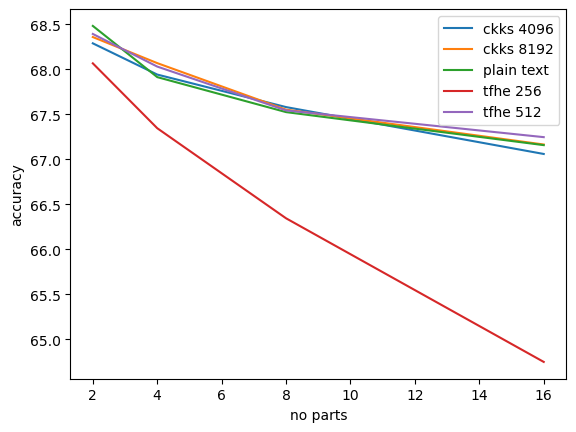

In [36]:
avg.T.plot()
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("no parts")
plt.savefig("figs/medmnist_acc.png")
plt.show()
